In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
# from census import Census
# from us import states

In [3]:
# states.lookup('DC')

In [4]:
# https://covidtracking.com/api/
df = pd.read_csv('us-daily.csv', \
                 parse_dates=True)

In [5]:
df

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200326,56,80735,438603,519338,60251,10131.0,1163.0,579589,2020-03-26T20:00:00Z,519338,276.0,3995.0,83468.0,17060.0,100528.0
1,20200325,56,63675,355135,418810,14735,6136.0,887.0,433545,2020-03-25T20:00:00Z,418810,212.0,1668.0,62377.0,11705.0,74082.0
2,20200324,56,51970,292758,344728,14433,4468.0,675.0,359161,2020-03-24T20:00:00Z,344728,204.0,1143.0,55437.0,9806.0,65243.0
3,20200323,56,42164,237321,279485,14571,3325.0,471.0,294056,2020-03-23T20:00:00Z,279485,73.0,771.0,43858.0,10276.0,54134.0
4,20200322,56,31888,193463,225351,2842,2554.0,398.0,228193,2020-03-22T20:00:00Z,225351,126.0,590.0,37554.0,8685.0,46239.0
5,20200321,56,23203,155909,179112,3477,1964.0,272.0,182589,2020-03-21T20:00:00Z,179112,53.0,1964.0,37762.0,6165.0,43927.0
6,20200320,56,17038,118147,135185,3336,NaN,219.0,138521,2020-03-20T20:00:00Z,135185,59.0,0.0,29028.0,5315.0,34343.0
7,20200319,56,11723,89119,100842,3025,NaN,160.0,103867,2020-03-19T20:00:00Z,100842,48.0,0.0,22894.0,3992.0,26886.0
8,20200318,56,7731,66225,73956,2538,NaN,112.0,76494,2020-03-18T20:00:00Z,73956,22.0,0.0,18621.0,2008.0,20629.0
9,20200317,56,5723,47604,53327,1687,NaN,90.0,55014,2020-03-17T20:00:00Z,53327,19.0,0.0,11500.0,1704.0,13204.0


In [6]:
df.columns

Index(['date', 'states', 'positive', 'negative', 'posNeg', 'pending',
       'hospitalized', 'death', 'total', 'dateChecked', 'totalTestResults',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [7]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
df.index.name = 'Date'

In [9]:
df.sort_index(inplace=True)

In [10]:
df['posNeg_daily'] = df['posNeg'].diff()

In [11]:
df['positive_daily'] = df['positive'].diff()

Text(0.5, 0, 'Date')

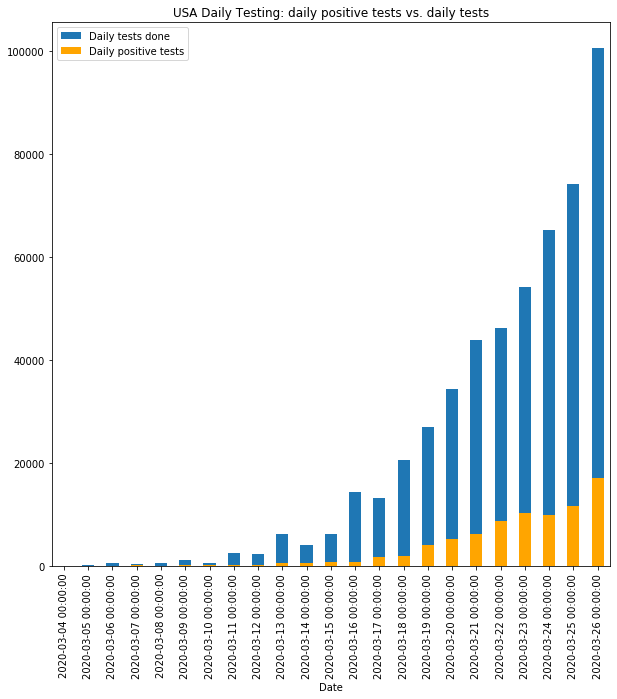

In [12]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

df['posNeg'].diff().plot(label="Daily tests done",kind="bar")
df['positive'].diff().plot(label="Daily positive tests",kind="bar",color="orange")

axes.legend()
axes.set_title("USA Daily Testing: daily positive tests vs. daily tests")
axes.set_xlabel("Date")

(0, 34.509661579462275)

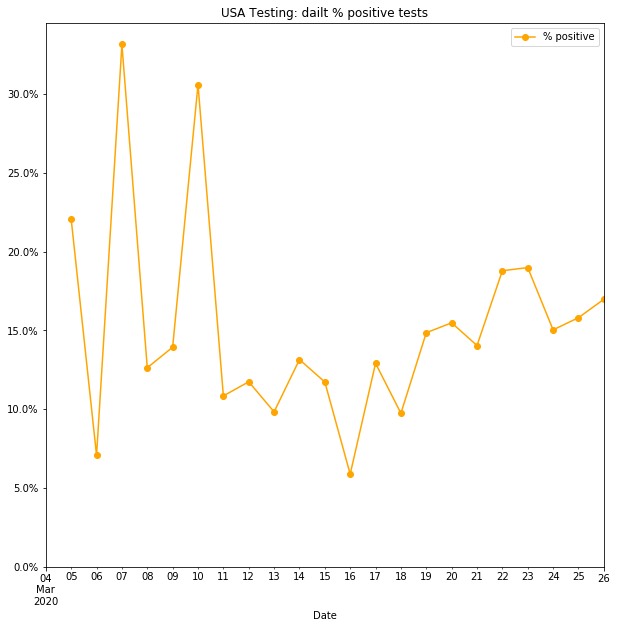

In [13]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

(df['positive'].diff() / df['posNeg'].diff() * 100.).plot(marker='o', label="% positive", color="orange")

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("USA Testing: dailt % positive tests")
axes.set_xlabel("Date")
axes.set_ylim(0)

In [14]:
# for index, row in df.iterrows():
#     print(pd.to_datetime(row['date'], format='%Y%m%d').strftime("%Y%m%d"), row['posNeg_daily'])